In [88]:
# Luetaan aineisto Pandas dDataframeen
import pandas as pd
df = pd.read_csv("Jälkiyhteenveto.csv",parse_dates=['Pvm', 'Jäljen \najoaika'], sep=";",encoding="latin-1")
#df['Jäljen \nikä'] = pd.to_datetime(df['Jäljen \nikä'], format='%H:%M').dt.time
#df['Jäljen ikä m'] = pd.to_datetime(df['Jäljen \nikä'], format='%H:%M').dt.minute
df['Jäljen \nikä'] = pd.to_datetime(df['Jäljen \nikä'], format='%H:%M').dt.hour+pd.to_datetime(df['Jäljen \nikä'], format='%H:%M').dt.minute/60
#df['Jäljen ajotunti'] = pd.to_datetime(df['Jäljen \najoaika'], format='%H:%M').dt.hour


In [2]:
%matplotlib inline

In [86]:
list(df.columns.values)

['Pvm',
 'Paikka',
 'Jäljen \nikä',
 'Jäljen \najoaika',
 'Jäljen ajon kesto',
 'Pääasiallinen\nalusta',
 '2. \nalusta',
 '3. \nalusta',
 'Opetustarkoitus',
 'Kuvaus',
 'Huomioi seuraavaksi',
 'Arvosana',
 'Lämpö-\ntila',
 'Tuuli\n[m/s]',
 'Säätyyppi',
 'Jäjen\npituus\n[m]',
 'Jäljen-\ntekijä',
 'Esineitä',
 'Löydetyt\nesineet']

In [85]:
df.head()

,Pvm,Paikka,Jäljen ikä,Jäljen ajoaika,Jäljen ajon kesto,Pääasiallinen alusta,2. alusta,3. alusta,Opetustarkoitus,Kuvaus,Huomioi seuraavaksi,Arvosana,Lämpö- tila,Tuuli [m/s],Säätyyppi,Jäjen pituus [m],Jäljen- tekijä,Esineitä,Löydetyt esineet
0,20.3.2018,Rosendahlin parkkis,0.083333,nan,NaN,Lumi,NaN,NaN,Jälkitarkan liinatyöskentelyn alkeet,NaN,NaN,8,-8.0,1.0,NaN,30,NaN,NaN,NaN
1,20.3.2018,Rosendahlin parkkis,0.083333,nan,NaN,Lumi,NaN,NaN,Jälkitarkan liinatyöskentelyn alkeet,NaN,NaN,8,-8.0,1.0,NaN,30,NaN,NaN,NaN
2,20.3.2018,Rosendahlin parkkis,0.083333,nan,NaN,Lumi,NaN,NaN,Jälkitarkan liinatyöskentelyn alkeet,NaN,NaN,8,-8.0,1.0,NaN,30,NaN,NaN,NaN
3,22.3.2018,Rosendahlin parkkis,0.083333,nan,NaN,Lumi,NaN,NaN,Jälkitarkan liinatyöskentelyn alkeet,NaN,NaN,7,NaN,NaN,NaN,30,NaN,NaN,NaN
4,22.3.2018,Tammelantori,0.416667,nan,NaN,Jää,NaN,NaN,Torijälki,NaN,NaN,5,NaN,NaN,NaN,100,NaN,NaN,NaN


In [108]:
print("Reenipäiviä: {}".format(df['Pvm'].unique().size))

Reenipäiviä 64


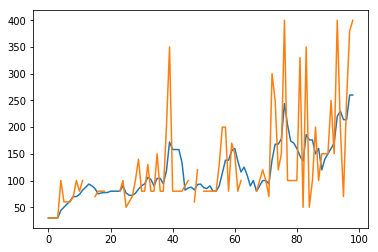

In [92]:
plt.figure();
df['Jäjen\npituus\n[m]']=df['Jäjen\npituus\n[m]'].map(lambda x: x.split("m")[0].strip() if type(x) is str else x)
df['Jäjen\npituus\n[m]'].rolling(5, min_periods=1).mean().plot()
df['Jäjen\npituus\n[m]'].rolling(1, min_periods=1).mean().plot()

In [35]:
#df['Jäljen \najoaika']

0       nan
1       nan
2       nan
3       nan
4       nan
5       nan
6       nan
7       nan
8       nan
9       nan
10      nan
11      nan
12      nan
13      nan
14      nan
15      nan
16      nan
17      nan
18      nan
19      nan
20      nan
21      nan
22      nan
23      nan
24      nan
25      nan
26      nan
27      nan
28    15:05
29    21:29
      ...  
69    10:50
70    22:16
71    22:47
72    21:15
73    20:43
74    23:22
75    20:01
76    18:39
77    18:50
78    18:55
79    19:30
80    19:35
81    20:35
82    10:03
83    10:13
84    19:00
85    19:00
86    19:00
87     9:00
88    19:00
89    19:30
90    17:30
91     9:00
92    23:30
93      nan
94      nan
95      nan
96    10:00
97    10:00
98    10:45
Name: Jäljen \najoaika, Length: 99, dtype: object

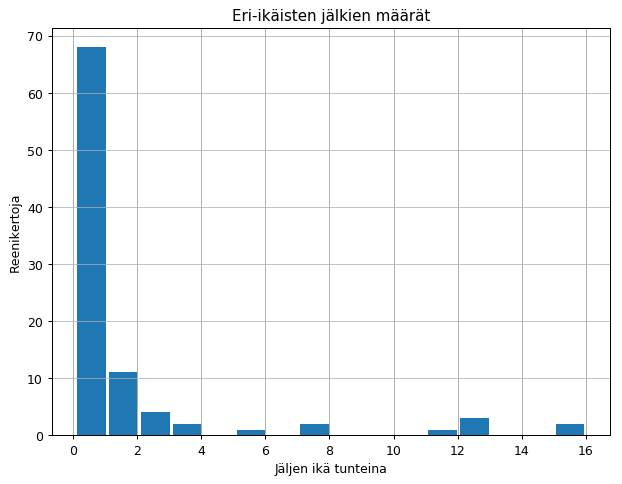

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ika=df["Jäljen \nikä"]

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')

ika.plot.hist(grid=True, bins=16, rwidth=0.9)
#, color='#607c8e')
plt.title('Eri-ikäisten jälkien määrät')
plt.xlabel('Jäljen ikä tunteina')
plt.ylabel('Reenikertoja')
plt.grid(axis='y', alpha=0.75)
plt.savefig('ikahistogrammi.png')

In [96]:
df['Jäjen\npituus\n[m]'].dropna()

0      30
1      30
2      30
3      30
4     100
5      60
6      60
7      60
8      70
9     100
10     80
11    100
15     70
16     80
17     80
18     80
23     80
24    100
25     50
26     60
27     70
28    100
29    140
30     80
31     80
32    130
33     80
34     80
35    150
36     80
     ... 
69    120
70    100
71     70
72    300
73    250
74    120
75    150
76    400
77    100
78    100
79    100
80    100
81    330
82     50
83    350
84     50
85    100
86    200
87    100
88    150
89    150
90    150
91    250
92    150
93    400
94    200
95     70
96    250
97    380
98    400
Name: Jäjen\npituus\n[m], Length: 86, dtype: object

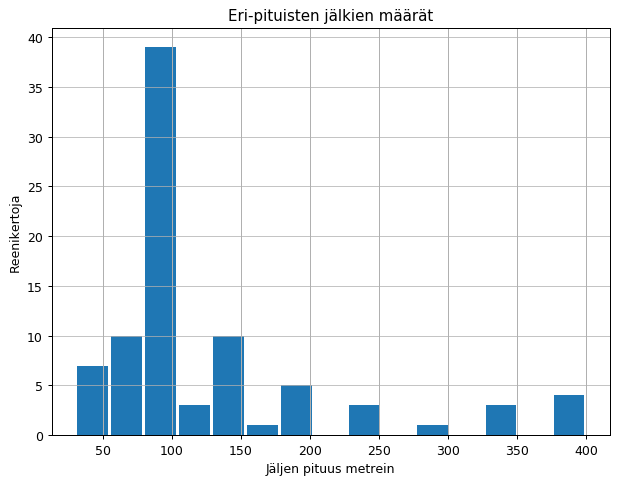

In [111]:
data=df['Jäjen\npituus\n[m]'].dropna().astype(int)

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')

data.plot.hist(grid=True, bins=15, rwidth=0.9)
#, color='#607c8e')
plt.title('Eri-pituisten jälkien määrät')
plt.xlabel('Jäljen pituus metreinä')
plt.ylabel('Reenikertoja')
plt.grid(axis='y', alpha=0.75)
plt.savefig('pituushistogrammi.png')

In [ ]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
    

In [34]:
#df['Pääasiallinen\nalusta'].str.split(" ")
df['Pääasiallinen\nalusta']=df['Pääasiallinen\nalusta'].map(lambda x: x.split(",")[0].strip() if type(x) is str else x)

In [69]:
import numpy as np
from PIL import Image
cloud_mask = np.array(Image.open("stalking-bc.png"))

#cloud_mask

In [65]:
def transform_format(val):
    if val.any() == 0:
        return 255
    else:
        return 0
    #val
    
transformed_mask = np.ndarray((mask.shape[0],cloud_mask.shape[1]), np.int32)

for i in range(len(cloud_mask)):
    transformed_mask[i] = list(map(transform_format, cloud_mask[i]))

In [70]:
#transformed_mask

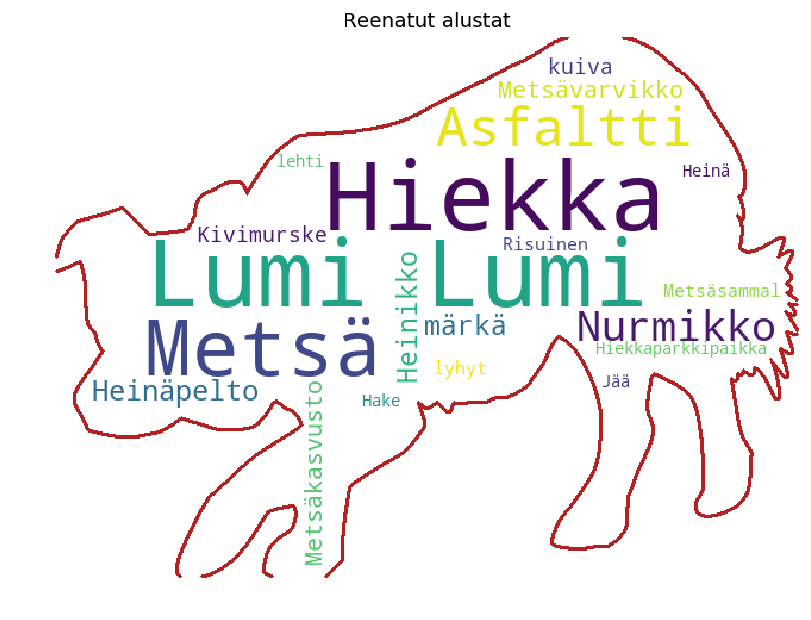

In [114]:
#https://www.kaggle.com/mchirico/quick-look-seaborn-wordcloud
from wordcloud import WordCloud

# Read the whole text.
text = ' '.join(df['Pääasiallinen\nalusta'])
text2 = ' '.join(df['2. \nalusta'].apply(str))
text3 = ' '.join(df['3. \nalusta'].apply(str))
#text = " ".join([text1,text2,text3])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),\
                      mask=transformed_mask,contour_width=3, contour_color='firebrick',\
                      max_font_size=80, relative_scaling=.3).generate(text)
plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(wordcloud)
plt.title('Reenatut alustat')
plt.axis("off")
plt.savefig('alustacloud.png')
plt.show()

In [31]:
#' '.join(df["Pääasiallinen\nalusta"])
#df["Pääasiallinen\nalusta"].loc[df["Pääasiallinen\nalusta"] == "Lumi"]
text

'Lumi Lumi Lumi Lumi Jää Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Lumi Hiekka Hiekka Hiekka Hiekkaparkkipaikka Lumi Hiekka Hiekka Hake Hiekka Lumi Metsä Hiekka Hiekka Hiekka Hiekka Hiekka Hiekka Kivimurske Hiekka Nurmikko Kivimurske Hiekka Hiekka Hiekka Asfaltti Asfaltti Asfaltti Asfaltti Asfaltti Asfaltti Kuiva lehti Metsäkasvusto Metsäkasvusto Asfaltti Metsäkasvusto Nurmikko Nurmikko Heinäpelto Nurmikko Metsä Nurmikko Nurmikko Hiekka Risuinen metsä Metsävarvikko Hiekka Asfaltti Metsävarvikko Metsävarvikko Hiekka Metsä Metsäsammal Heinäpelto Heinäpelto Heinäpelto Heinäpelto Nurmikko Heinikko Hiekka Hiekka Hiekka Hiekka Metsä Hiekka Metsä Heinikko Heinä Metsä Heinikko Heinikko Metsä Metsä Metsä Metsä'